In [52]:
!pip install ucimlrepo


[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV,RandomizedSearchCV,KFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score,rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("songs.csv")

In [4]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,NaN,A#,0.115,-5.201,Minor,0.0748,100.889,04-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,NaN,D,0.124,-7.043,Minor,0.0300,115.00200000000001,04-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,NaN,G#,0.534,-4.617,Major,0.0345,127.994,04-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,NaN,C#,0.157,-4.498,Major,0.2390,128.014,04-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,NaN,F#,0.157,-6.266,Major,0.0413,145.036,04-Apr,0.323,Electronic


In [5]:
df.isna().sum()

instance_id            5
artist_name            5
track_name             5
popularity             5
acousticness           5
danceability          16
duration_ms            5
energy                 5
instrumentalness      20
key                    5
liveness               5
loudness               5
mode                   5
speechiness          638
tempo               1053
obtained_date          5
valence                5
music_genre            5
dtype: int64

In [6]:
cols_to_drop = ['instance_id', 'artist_name', 'track_name', 'popularity', 'obtained_date']

In [7]:
song_df = df.drop(columns = cols_to_drop,axis=1)

In [8]:
subset = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
         'valence', 'music_genre']

In [9]:
song_df = song_df.dropna(subset=subset)

In [10]:
song_df.isna().sum()

acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness          633
tempo               1037
valence                0
music_genre            0
dtype: int64

In [11]:
song_df.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

In [12]:
song_df["key"].unique()

array(['G', 'C#', 'C', 'G#', 'F#', 'A', 'D', 'F', 'A#', 'B', 'E', 'D#'],
      dtype=object)

In [13]:
song_df["tempo"] = song_df["tempo"].replace("?",np.nan,regex=False)

In [14]:
song_df["tempo"] = song_df["tempo"].replace(" ",np.nan,regex=False)

In [15]:
song_df.isna().sum()

acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness          633
tempo               4981
valence                0
music_genre            0
dtype: int64

In [16]:
song_df["tempo"] = song_df["tempo"].astype("float")

In [17]:
X = song_df.drop("music_genre",axis=1)
X = pd.get_dummies(X,drop_first = True,dtype = int)
y = song_df["music_genre"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1729, stratify=y)

In [19]:
steps = [("impute", SimpleImputer()),
         ("scale",StandardScaler()),
         ("km",KMeans(random_state=1729))]

In [20]:
pipe = Pipeline(steps=steps)

In [21]:
pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('impute', ...), ('scale', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a 

In [22]:
y_pred = pipe.predict(X_test)

In [23]:
y_pred

array([3, 6, 4, ..., 6, 2, 6], shape=(9995,), dtype=int32)

In [24]:
pipe.steps

[('impute', SimpleImputer()),
 ('scale', StandardScaler()),
 ('km', KMeans(random_state=1729))]

In [25]:
rand_score(y_test,y_pred)

0.7400135328821105

In [26]:
pipe.named_steps['km'].labels_

array([3, 3, 0, ..., 3, 1, 2], shape=(39979,), dtype=int32)

In [27]:
pipe.n_features_in_

22

In [28]:
pipe.named_steps['km'].cluster_centers_ # Gives cluster centre of each array [each centre is 22-d]

array([[-1.08960507e-01,  2.19756342e-01, -4.63215170e-02,
         1.51803314e-01, -1.65451509e-01, -1.95080412e-02,
         2.39757013e-01,  1.00132170e-01,  3.24748570e-02,
         1.62876696e-01,  2.54456007e+00, -2.86365022e-01,
        -3.54040701e-01, -3.48017380e-01, -3.44620251e-01,
         1.51258187e+00, -2.84366074e-01, -3.06490471e-01,
        -2.58381398e-01, -3.59253716e-01, -2.67354343e-01,
         3.47508653e-01],
       [-1.43775427e-01,  1.14250055e-01, -6.21118583e-02,
         1.36992081e-01, -1.93331846e-01,  3.39475212e-02,
         2.24941536e-01, -8.08044319e-02,  1.01816628e-01,
         1.15785327e-01, -2.67085717e-01, -2.86365022e-01,
         2.82453401e+00, -3.48017380e-01, -3.44620251e-01,
        -1.82307394e-01, -2.84366074e-01, -3.06490471e-01,
        -2.58381398e-01, -3.59253716e-01, -2.67354343e-01,
        -3.18721959e-01],
       [-3.43757440e-01,  2.40683789e-01, -5.47065260e-02,
         3.28776757e-01, -2.38177080e-01,  5.96268567e-02,
    

In [29]:
# f1_score(y_test,y_pred,average="macro")
# It will give error because y_pred is in the number coded format as returned by KMeans, while y_test is in string format

In [226]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 


In [227]:
X = iris.data.features 
y = iris.data.targets 

In [228]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [229]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [230]:
le = LabelEncoder()

In [231]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [232]:
y = y.values.reshape(150)

In [233]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [234]:
y = le.fit_transform(y)

In [235]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [236]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [237]:
le.inverse_transform([0])

array(['Iris-setosa'], dtype=object)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [239]:
model = KMeans(n_clusters=3)

In [240]:
model.fit(X_train,y_train)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [241]:
y_pred= model.predict(X_test)

In [242]:
model.score(X_test,y_test)
#sklearn assumes: higher score = better

# But KMeans minimizes loss # Depends on which estimator you are using, and what is their objevtive or loss function

# So they return negative loss

# Maximizing -7.47 → minimizing 7.47

-16.558629373746676

In [243]:
rand_score(y_test,y_pred) # y_test need to be 1-D

0.9172413793103448

In [244]:
X_test = X_test.values.reshape(30,4)

In [245]:
xs = X_test[:,0]

In [246]:
ys = X_test[:,1]

In [247]:
centers = model.cluster_centers_

In [248]:
centers

array([[6.84193548, 3.07096774, 5.66129032, 2.00645161],
       [5.0225    , 3.425     , 1.4625    , 0.2425    ],
       [5.89183673, 2.74693878, 4.39591837, 1.43877551]])

In [249]:
centers_x = centers[:,0]
centers_y = centers[:,1]

In [250]:
y_pred

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 1, 0], dtype=int32)

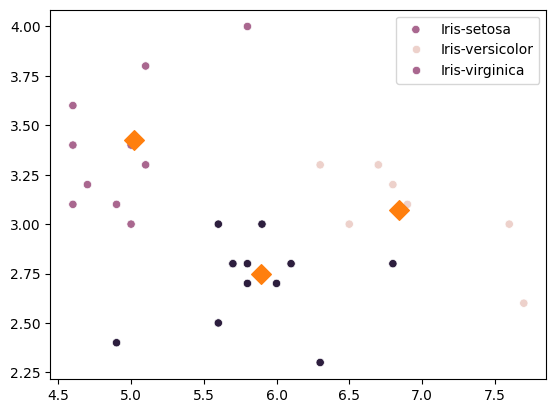

In [251]:
# using first two features as x and y 
# using first two coordinates of cluster centres for centroid to get idea of our clustering
colour = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # from le.classes_ will get idea that which is 0,1, 2
sns.scatterplot(x = xs,y = ys,hue = y_pred,hue_order = [0,1,2])
plt.legend(colour)
#c : colours is based on predicted value, same points on scatter plot, colour will be decided by category predicted by model
plt.scatter(centers_x,centers_y,marker="D",s=100)
plt.show()

In [224]:
type(X_test)
type(y_test)

numpy.ndarray

In [259]:
X_test[:,0]

array([5. , 6.1, 6.3, 6.5, 7.6, 6.8, 4.6, 4.6, 5.6, 4.9, 5. , 6.9, 5.7,
       6. , 5.8, 5.9, 4.7, 5.1, 6.7, 5.6, 5.8, 5.8, 5.7, 5.1, 6.3, 7.7,
       6.8, 4.9, 4.6, 6.7])

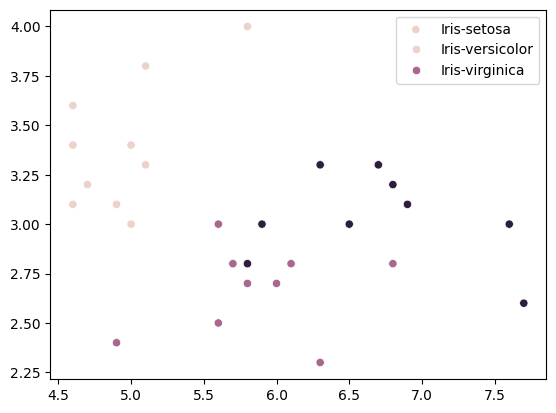

In [261]:
sns.scatterplot(x=X_test[:,0],y = X_test[:,1],hue = y_test )
plt.legend(colour)
plt.show()

In [220]:
y_pred = le.inverse_transform(y_pred)

In [221]:
pd.crosstab(y_test,y_pred)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,0,10
1,8,2,0
2,3,7,0
